# This wells - Analysis Conducted By **Maher Gebrail**  

List of Contents:

1. Exploring.
2. Manipulating & Cleaning.
3. predictive model. 


# 1. Explore The Data

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

%matplotlib inline

In [64]:
df = pd.read_csv('data.csv')

In [65]:
df.head()

,WellID,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,LeftNeighbourType,RightDistance,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR
0,500109742,1.105028,NIOBRARA,1687.414535,NaN,8084.0,1256.308758,1234.370856,NaN,NoNeighbour,NaN,NoNeighbour,7501.0,15.234785,37.674048
1,500109753,0.644480,NIOBRARA,2267.667384,NaN,3912.0,742.842536,784.000000,NaN,NoNeighbour,1330.0,Codeveloped,7551.0,5.327198,11.627301
2,500109754,0.620268,NIOBRARA,2368.236087,NaN,4137.0,912.738700,1127.047136,1330.0,Codeveloped,NaN,NoNeighbour,7594.0,5.629925,14.544356
3,500109760,0.649670,NIOBRARA,333.876618,NaN,4161.0,914.683970,691.026676,NaN,NoNeighbour,NaN,NoNeighbour,7391.0,8.240087,7.012257
4,500109772,1.423475,NIOBRARA,3608.065949,3199.96293,4418.0,747.271843,928.239928,NaN,NoNeighbour,NaN,NoNeighbour,7838.0,15.374830,51.169534


## More info related to columns or Chemicals related to the data.

* *proppant*

    > Sized particles mixed with fracturing fluid to hold fractures open after a hydraulic fracturing treatment. In addition to naturally occurring sand grains, man-made or specially engineered proppants, such as resin-coated sand or high-strength ceramic materials like sintered bauxite, may also be used. Proppant materials are carefully sorted for size and sphericity to provide an efficient conduit for production of fluid from the reservoir to the wellbore.

* **ProppantPerFoot : float**
    > The amount (in pounds) of proppant (a chemical used to frac a well) per foot of the well’s length, more on proppant

* **FormationAlias : str**

    > (the mix in the soil) - The zone/rock in the earth’s crust the well extracts oil and gas from
    > **If there is a suitable combination of source rock, reservoir rock, cap rock and a trap in an area, recoverable oil and gas deposits may be discovered there**
    
* *BVHH: float* 
    > A positive number indicating rock quality at the area a certain well is drilled

* *NioGOR: float*
    > A positive number indicating the Gas-to-Oil ratio in the Niobrara formation at the well’s coordinates

* *CodGOR: float* 
    > A positive number indicating the Gas-to-Oil ratio in the Codell formation at the well’s coordinates

* *LateralLength: float* 
    > The length of the drilled well in feet

* *FluidPerFoot : float*
    > The amount (in gallons) of fluid (used to frac the well) per foot of the well’s length

* *{Left/Right}Distance : float*
    > The distance away from the {left/right} nearest neighbouring well

* *{Left/Right}NeighbourType : str*
    > Whether this well’s {left/right} neighbouring well was drilled prior to the well (parent), drilled with the well (co-developed), or no existing neighbour

* *TVD : float*
    > The depth of the well (True Vertical Depth)

## Exploring How the data is organized and how columns are correlated

### Checking The Values inside our dataset

In [66]:
df.shape

(9206, 15)

In [67]:
df[['ProppantPerFoot', 'FormationAlias']]

,ProppantPerFoot,FormationAlias
0,1256.308758,NIOBRARA
1,742.842536,NIOBRARA
2,912.738700,NIOBRARA
3,914.683970,NIOBRARA
4,747.271843,NIOBRARA
...,...,...
9201,1393.493883,CODELL
9202,2758.550901,CODELL
9203,2531.677278,CODELL
9204,1536.333026,CODELL


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              9206 non-null   int64  
 1   BVHH                7565 non-null   float64
 2   FormationAlias      9206 non-null   object 
 3   NioGOR              8709 non-null   float64
 4   CodGOR              7538 non-null   float64
 5   LateralLength       9206 non-null   float64
 6   ProppantPerFoot     8974 non-null   float64
 7   FluidPerFoot        8942 non-null   float64
 8   LeftDistance        6758 non-null   float64
 9   LeftNeighbourType   9206 non-null   object 
 10  RightDistance       6778 non-null   float64
 11  RightNeighbourType  9206 non-null   object 
 12  TVD                 8893 non-null   float64
 13  NormalizedOilEUR    9206 non-null   float64
 14  NormalizedGasEUR    9206 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.1+ 

In [69]:
# check the space of nan values
df.isna().sum()

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64

In [70]:
print(df.WellID.nunique()) # WellID shows that it's useless for analysis as each well has it's own row.
#df.drop('WellID', axis=1) # will be used in clearing


9206


**Checking Soil & neighbors wells types**

In [71]:
print(df.FormationAlias.value_counts())

FormationAlias
NIOBRARA    6917
CODELL      2289
Name: count, dtype: int64


In [72]:
# print('na values: ', df.RightNeighbourType.isna().sum())
print(df.RightNeighbourType.value_counts())

RightNeighbourType
Codeveloped    6055
NoNeighbour    2428
Parent          723
Name: count, dtype: int64


In [73]:
# print('na values: ', df.LeftNeighbourType.isna().sum())
print(df.LeftNeighbourType.value_counts())

LeftNeighbourType
Codeveloped    6046
NoNeighbour    2448
Parent          712
Name: count, dtype: int64


In [74]:
## how many of neighbors [left/ right] are actually the same type, from the left or right ? 
(df['RightNeighbourType'] == df['LeftNeighbourType']).sum() / df['RightNeighbourType'].shape[0] * 100

67.69498153378231

### Check the correlation of our neighbors wells state with predicting the Oil & Gas.

In [75]:
df[['RightNeighbourType', 'NormalizedOilEUR', 'NormalizedGasEUR']].groupby('RightNeighbourType').mean()

,NormalizedOilEUR,NormalizedGasEUR
RightNeighbourType,,
Codeveloped,18.819926,114.607217
NoNeighbour,19.474842,86.520349
Parent,19.344230,96.814487


In [76]:
df[['LeftNeighbourType', 'NormalizedOilEUR', 'NormalizedGasEUR']].groupby('LeftNeighbourType').mean()

,NormalizedOilEUR,NormalizedGasEUR
LeftNeighbourType,,
Codeveloped,18.792466,114.137163
NoNeighbour,19.602766,87.699608
Parent,19.127281,97.265522


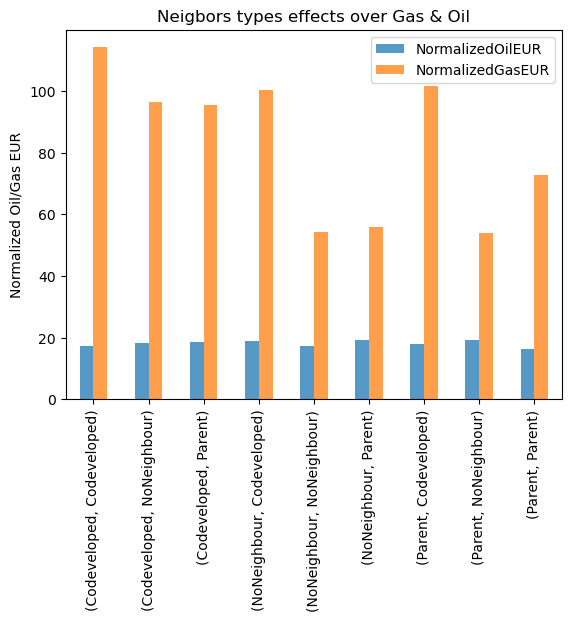

In [77]:
df[['LeftNeighbourType','RightNeighbourType', 'NormalizedOilEUR', 'NormalizedGasEUR']].groupby(['LeftNeighbourType', 'RightNeighbourType']).median().plot(kind='bar',alpha=0.75, xlabel='', ylabel='Normalized Oil/Gas EUR');
plt.title(ha='center', label='Neigbors types effects over Gas & Oil');
# plt.xticks(rotation=30);

In [78]:
# df[['LeftNeighbourType','RightNeighbourType', 'NormalizedGasEUR']].groupby(['LeftNeighbourType', 'RightNeighbourType']).median()

In [79]:
# df[['LeftNeighbourType','RightNeighbourType', 'NormalizedOilEUR']].groupby(['LeftNeighbourType', 'RightNeighbourType']).median()

*codeveloped neighbors* might means higher Gas ratio and less oil 

**From this observation we may choose whether we make ('no neigh'/ 'parent') as one option or just keep them both**.

In [80]:
df.corr(numeric_only=1)[['NormalizedOilEUR', 'NormalizedGasEUR']].sort_values(by='NormalizedOilEUR', ascending=False)

,NormalizedOilEUR,NormalizedGasEUR
NormalizedOilEUR,1.000000,0.290420
NormalizedGasEUR,0.290420,1.000000
FluidPerFoot,0.228955,0.075338
ProppantPerFoot,0.222627,-0.054080
RightDistance,0.100550,-0.025718
LeftDistance,0.084655,-0.019613
BVHH,0.073222,0.433283
WellID,-0.008422,-0.295116
NioGOR,-0.025234,0.107971
LateralLength,-0.055300,-0.064781


__The Correlation between data Columns__

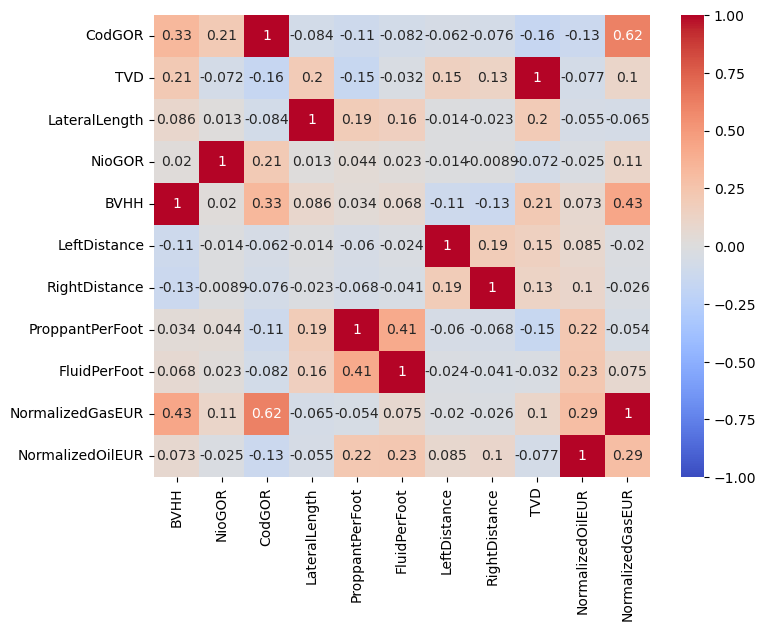

In [81]:
# Correlation matrix
correlation_matrix = df.drop('WellID', axis=1).corr(numeric_only=1).sort_values(by='NormalizedOilEUR', ascending=1)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2g', vmin=-1, vmax=1, annot=True)
plt.show()

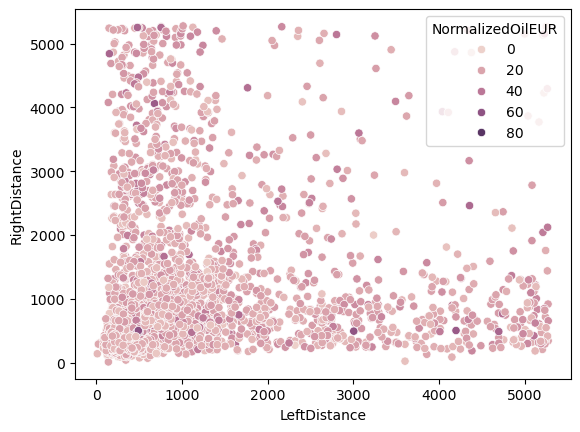

In [82]:
# the plot to show the corelation between neighbors and finding oil.
sns.scatterplot(x='LeftDistance', y='RightDistance', hue='NormalizedOilEUR', data=df);

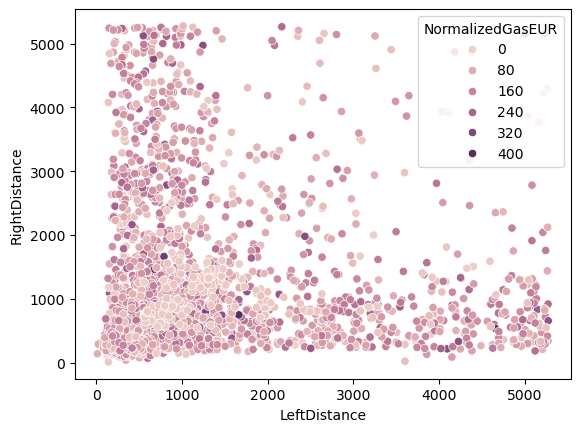

In [83]:
# the plot to show the corelation between neighbors and finding Gas.
sns.scatterplot(x='LeftDistance', y='RightDistance', hue='NormalizedGasEUR', data=df);

In [84]:
# # Pairplot to see relationships
# sns.pairplot(df, vars=['BVHH', 'NioGOR', 'CodGOR', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot', 'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR'])
# plt.show();

__Checking about Outliers in the data.__

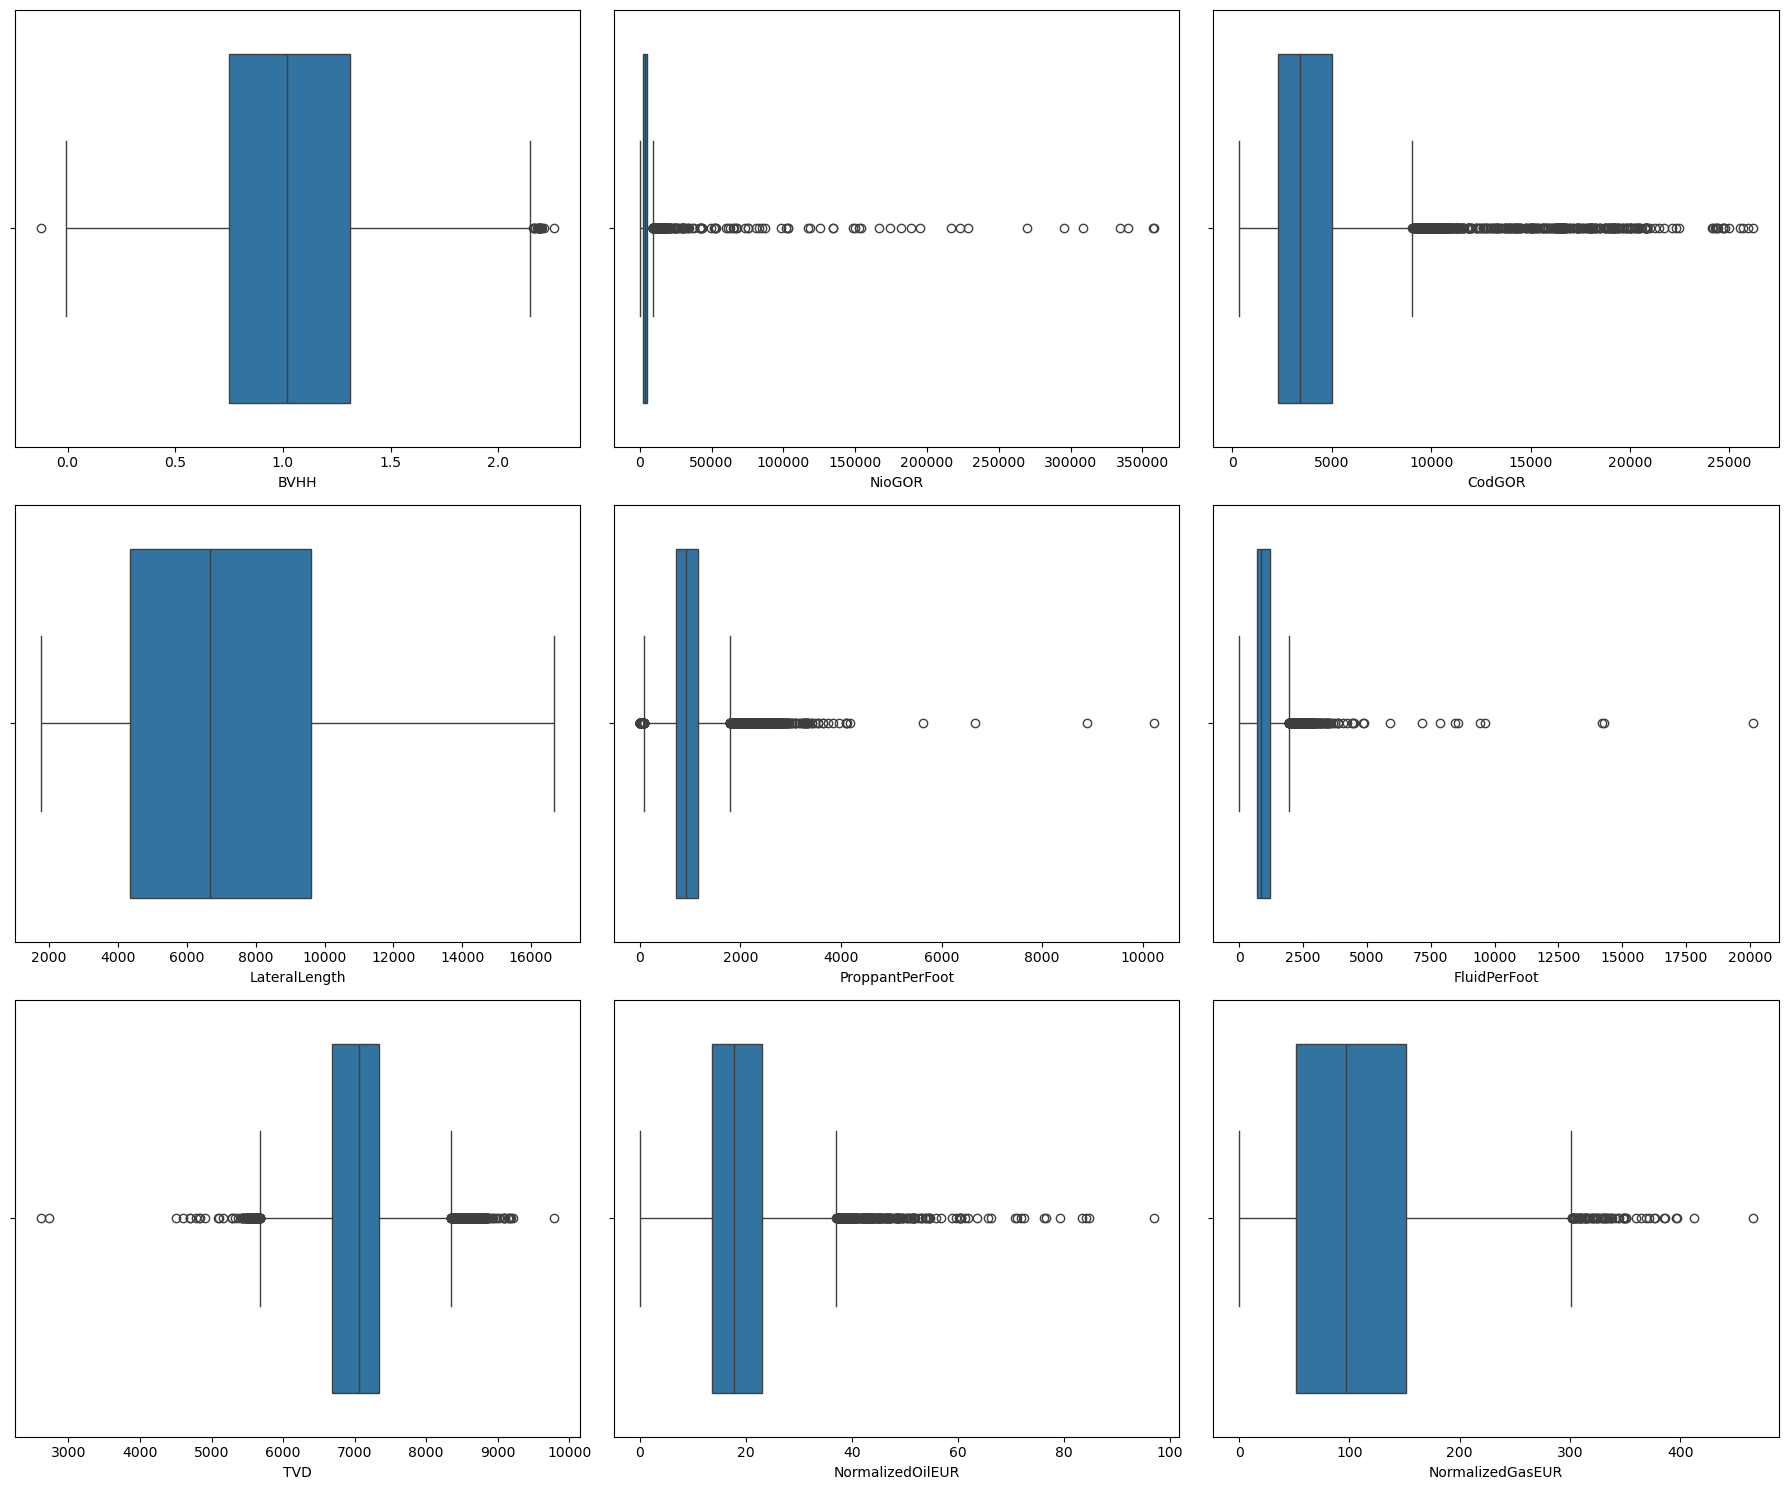

In [85]:
# Boxplots to see outliers and distribution
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
n_columns =['BVHH', 'NioGOR', 'CodGOR', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot', 'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR']

for i in range(3):
    for j in range(3):
        sns.boxplot(ax=axes[i, j], x=n_columns[i*3 + j], data=df)
plt.tight_layout()
plt.show();

> It seems that The data is full of outliers - which will push us towards using a **RobustScaler** in the preprocessing pipeline before further actions.

ProppantPerFoot : float

    The amount (in pounds) of proppant (a chemical used to frac a well) per foot of the well’s length, more on proppant

FormationAlias : str

**checking the correlation of soil type with the oil.**

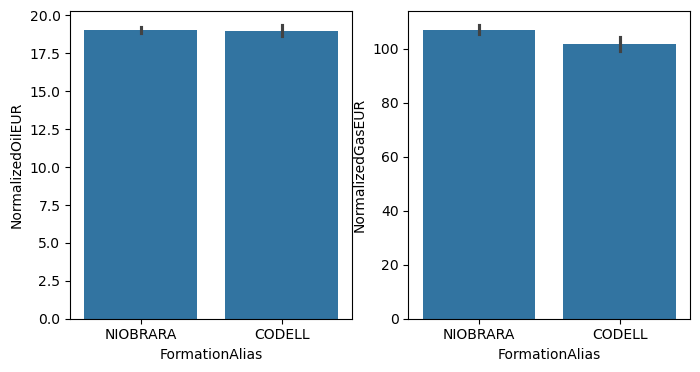

In [86]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(ax=axes[0], x='FormationAlias', y='NormalizedOilEUR', data=df)
sns.barplot(ax=axes[1], x='FormationAlias', y='NormalizedGasEUR', data=df)
plt.show()

In [87]:
grouped_formation = df[['FormationAlias', 'NormalizedOilEUR', 'NormalizedGasEUR']].groupby('FormationAlias')
grouped_formation.mean()

,NormalizedOilEUR,NormalizedGasEUR
FormationAlias,,
CODELL,18.985596,101.820300
NIOBRARA,19.049792,107.119895


In [88]:
grouped_formation.median()

,NormalizedOilEUR,NormalizedGasEUR
FormationAlias,,
CODELL,17.787298,98.973580
NIOBRARA,17.695616,96.591012


**It doesn't seem that that the type of FormationAlias that are represented in the data does accually make difference**

na counts:  232


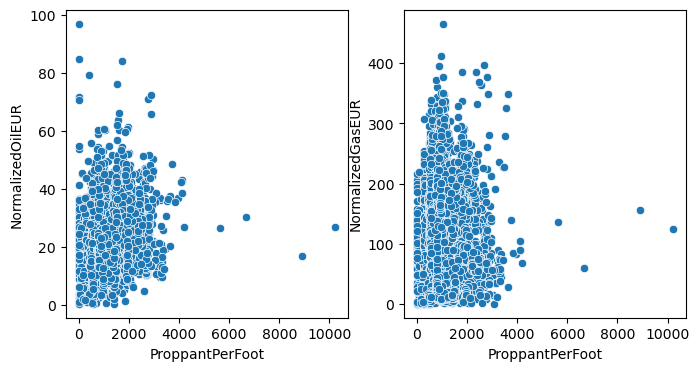

In [89]:
print('na counts: ', df.ProppantPerFoot.isna().sum())
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(ax=axes[0], x='ProppantPerFoot', y='NormalizedOilEUR', data=df)
sns.scatterplot(ax=axes[1], x='ProppantPerFoot', y='NormalizedGasEUR', data=df)
plt.show()

In [90]:
df[['ProppantPerFoot', 'NormalizedOilEUR', 'NormalizedGasEUR']].corr()[['NormalizedOilEUR', 'NormalizedGasEUR']]

,NormalizedOilEUR,NormalizedGasEUR
ProppantPerFoot,0.222627,-0.05408
NormalizedOilEUR,1.000000,0.29042
NormalizedGasEUR,0.290420,1.00000


# 2. Manipulate and Clean the data for analysis.

## Explore for feature Engineering the data.

In [91]:
cleaned_df = df.copy()
# (if cond)in case i re-run the cell again
if 'WellID' in cleaned_df.columns:
    cleaned_df.drop('WellID', axis=1, inplace=True)
cleaned_df.head()

,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftDistance,LeftNeighbourType,RightDistance,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR
0,1.105028,NIOBRARA,1687.414535,NaN,8084.0,1256.308758,1234.370856,NaN,NoNeighbour,NaN,NoNeighbour,7501.0,15.234785,37.674048
1,0.644480,NIOBRARA,2267.667384,NaN,3912.0,742.842536,784.000000,NaN,NoNeighbour,1330.0,Codeveloped,7551.0,5.327198,11.627301
2,0.620268,NIOBRARA,2368.236087,NaN,4137.0,912.738700,1127.047136,1330.0,Codeveloped,NaN,NoNeighbour,7594.0,5.629925,14.544356
3,0.649670,NIOBRARA,333.876618,NaN,4161.0,914.683970,691.026676,NaN,NoNeighbour,NaN,NoNeighbour,7391.0,8.240087,7.012257
4,1.423475,NIOBRARA,3608.065949,3199.96293,4418.0,747.271843,928.239928,NaN,NoNeighbour,NaN,NoNeighbour,7838.0,15.374830,51.169534


**checking again about na values before proceeding.**

In [92]:
cleaned_df.isna().sum()

BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64

**it would be practically better to just know the distance of the neighbors more than in which direction, so we will add "neighDistance" by min of any wells neighbors**

In [93]:
cleaned_df.loc[cleaned_df.LeftDistance.isna(), 'LeftDistance'] = cleaned_df.loc[cleaned_df.LeftDistance.isna(), 'RightDistance']
cleaned_df.loc[cleaned_df.RightDistance.isna(), 'RightDistance'] = cleaned_df.loc[cleaned_df.RightDistance.isna(), 'LeftDistance']

cleaned_df['neighDistance'] = np.min(df[['LeftDistance', 'RightDistance']], axis=1)
cleaned_df[['LeftDistance', 'RightDistance', 'neighDistance']].head()

,LeftDistance,RightDistance,neighDistance
0,NaN,NaN,NaN
1,1330.0,1330.0,1330.0
2,1330.0,1330.0,1330.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [94]:
if 'LeftDistance' in cleaned_df.columns:   ## in case re-running the cell
    cleaned_df.drop('LeftDistance', inplace=True, axis=1)
    cleaned_df.drop('RightDistance', inplace=True, axis=1)
# cleaned_df.head()

**After removing left/right dist .. we can fill neighDistance with zero, inf, or even mean but it's not practical right now to fill it with zero, as may in future "wells" can be discovered, so na values will be filled with Imputer later.**

In [95]:
cleaned_df.isna().sum()

BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftNeighbourType        0
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
neighDistance         1465
dtype: int64

__since fluid and Proppant has higher correlation with the target columns, we can't just take the risk of letting the data be biased by filling them with random data, so we will drop their na rows.__

In [96]:
cleaned_df.dropna(subset=['FluidPerFoot', 'ProppantPerFoot'], inplace=True)
print(cleaned_df.shape)
cleaned_df.isna().sum()

(8942, 13)


BVHH                  1630
FormationAlias           0
NioGOR                 474
CodGOR                1599
LateralLength            0
ProppantPerFoot          0
FluidPerFoot             0
LeftNeighbourType        0
RightNeighbourType       0
TVD                    295
NormalizedOilEUR         0
NormalizedGasEUR         0
neighDistance         1353
dtype: int64

__investigate in BVHH as it has higher correlation with target column espicially with GAS__

In [97]:
print(cleaned_df.BVHH.agg(['min', 'max', 'mean', 'median']))

cleaned_df[['BVHH', 'NormalizedOilEUR', 'NormalizedGasEUR']].corr()[['NormalizedOilEUR', 'NormalizedGasEUR']]

min      -0.125405
max       2.260032
mean      1.034276
median    1.025229
Name: BVHH, dtype: float64


,NormalizedOilEUR,NormalizedGasEUR
BVHH,0.084699,0.428263
NormalizedOilEUR,1.000000,0.295203
NormalizedGasEUR,0.295203,1.000000


**import needed libs for data pre-processing**

In [98]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [99]:
cleaned_df.head()

,BVHH,FormationAlias,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,LeftNeighbourType,RightNeighbourType,TVD,NormalizedOilEUR,NormalizedGasEUR,neighDistance
0,1.105028,NIOBRARA,1687.414535,NaN,8084.0,1256.308758,1234.370856,NoNeighbour,NoNeighbour,7501.0,15.234785,37.674048,NaN
1,0.644480,NIOBRARA,2267.667384,NaN,3912.0,742.842536,784.000000,NoNeighbour,Codeveloped,7551.0,5.327198,11.627301,1330.0
2,0.620268,NIOBRARA,2368.236087,NaN,4137.0,912.738700,1127.047136,Codeveloped,NoNeighbour,7594.0,5.629925,14.544356,1330.0
3,0.649670,NIOBRARA,333.876618,NaN,4161.0,914.683970,691.026676,NoNeighbour,NoNeighbour,7391.0,8.240087,7.012257,NaN
4,1.423475,NIOBRARA,3608.065949,3199.96293,4418.0,747.271843,928.239928,NoNeighbour,NoNeighbour,7838.0,15.374830,51.169534,NaN


In [100]:
cleaned_df.isna().sum()

BVHH                  1630
FormationAlias           0
NioGOR                 474
CodGOR                1599
LateralLength            0
ProppantPerFoot          0
FluidPerFoot             0
LeftNeighbourType        0
RightNeighbourType       0
TVD                    295
NormalizedOilEUR         0
NormalizedGasEUR         0
neighDistance         1353
dtype: int64

__Statisically description of the data before scalling or filling the na(s).__

In [101]:
cleaned_df.describe()

,BVHH,NioGOR,CodGOR,LateralLength,ProppantPerFoot,FluidPerFoot,TVD,NormalizedOilEUR,NormalizedGasEUR,neighDistance
count,7312.000000,8468.000000,7343.000000,8942.000000,8942.000000,8942.000000,8647.00000,8942.000000,8942.000000,7589.000000
mean,1.034276,4707.275296,4238.793565,7033.098331,1014.194397,1035.336411,7017.32254,18.998403,106.562998,673.829622
std,0.368010,12526.461276,3325.587987,2670.688644,528.301439,629.271011,614.78040,8.004233,66.317968,664.835889
min,-0.125405,85.752059,336.475960,1749.000000,0.000000,0.001171,2610.00000,0.446867,0.000000,14.000000
25%,0.755179,2199.869834,2329.889472,4377.250000,727.143814,703.318099,6687.00000,13.646120,52.239863,313.000000
50%,1.025229,3468.353342,3419.641062,6764.000000,923.785016,862.066743,7065.00000,17.720051,98.059126,496.000000
75%,1.310907,4903.486384,5009.286164,9612.000000,1153.524415,1207.024954,7349.50000,22.984912,151.723588,769.000000
max,2.260032,357894.183700,26193.592720,16676.000000,10217.314930,20117.640690,9793.00000,84.125736,465.849396,5276.000000


## Create the imputer and fit it on the training data.

a. choosing the columns that we are going to work with

In [102]:
target_columns = ['NormalizedOilEUR', 'NormalizedGasEUR']
str_columns = ['LeftNeighbourType', 'RightNeighbourType','FormationAlias']
numeric_columns = ['BVHH', 'NioGOR', 'CodGOR', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot', 'TVD', 'neighDistance']

print('Target Columns: ', target_columns)
print('**Used columns for predictions**')
print('categorical columns: ', str_columns)
print('numerical columns :  ', numeric_columns)

Target Columns:  ['NormalizedOilEUR', 'NormalizedGasEUR']
**Used columns for predictions**
categorical columns:  ['LeftNeighbourType', 'RightNeighbourType', 'FormationAlias']
numerical columns :   ['BVHH', 'NioGOR', 'CodGOR', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot', 'TVD', 'neighDistance']


b. create our pipeline

In [103]:
# creating the pipeline for preprocessing the data
numeric_columns_pipeline = Pipeline([
                            ('imputer',  KNNImputer(n_neighbors=20)),
                            ('scaler', RobustScaler()), 
                            ])

categorical_columns_pipeline = Pipeline([
                                ('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('encoding',  OneHotEncoder(handle_unknown='ignore'))
                                ])


columns_pipeline_processor= ColumnTransformer([
    ('numeric_columns', numeric_columns_pipeline, numeric_columns), 
    ('str_columns', categorical_columns_pipeline, str_columns)
])
columns_pipeline_processor

ColumnTransformer(transformers=[('numeric_columns',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(n_neighbors=20)),
                                                 ('scaler', RobustScaler())]),
                                 ['BVHH', 'NioGOR', 'CodGOR', 'LateralLength',
                                  'ProppantPerFoot', 'FluidPerFoot', 'TVD',
                                  'neighDistance']),
                                ('str_columns',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['LeftNeighbourType', 'RightNeighbourType',
                                  'FormationAlias'])])

## Splitting the data into "features and target" & "training and test data".

In [104]:
X = cleaned_df[numeric_columns + str_columns].copy()
Y = cleaned_df[target_columns].copy()

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)
print("length of training data: ", len(X_train))
print("length of testing data: ", len(X_test))

length of training data:  7153
length of testing data:  1789


In [106]:
def add_columns_names_after_imputation(imputer_in, arr):
    columns_name_out = imputer_in.get_feature_names_out()
    columns_name_out_clear = [c.split('__')[-1] for c in columns_name_out]
    return pd.DataFrame(arr, columns=columns_name_out_clear)

**fit and transform the training data.**

In [107]:
# transform the data
X_imputed_train = columns_pipeline_processor.fit_transform(X_train)

__[first row] original training data__

In [108]:
X.iloc[0,:] 

BVHH                     1.105028
NioGOR                1687.414535
CodGOR                        NaN
LateralLength              8084.0
ProppantPerFoot       1256.308758
FluidPerFoot          1234.370856
TVD                        7501.0
neighDistance                 NaN
LeftNeighbourType     NoNeighbour
RightNeighbourType    NoNeighbour
FormationAlias           NIOBRARA
Name: 0, dtype: object

__[first row] data after preprocessing__

In [109]:
X_imputed_train_labeled = add_columns_names_after_imputation(columns_pipeline_processor, X_imputed_train)
X_imputed_train_labeled.iloc[0,:]

BVHH                              1.202819
NioGOR                            0.161393
CodGOR                            1.169415
LateralLength                     0.549742
ProppantPerFoot                  -0.147308
FluidPerFoot                     -1.678951
TVD                              -0.044343
neighDistance                    -0.059694
LeftNeighbourType_Codeveloped     0.000000
LeftNeighbourType_NoNeighbour     1.000000
LeftNeighbourType_Parent          0.000000
RightNeighbourType_Codeveloped    0.000000
RightNeighbourType_NoNeighbour    1.000000
RightNeighbourType_Parent         0.000000
FormationAlias_CODELL             0.000000
FormationAlias_NIOBRARA           1.000000
Name: 0, dtype: float64

__The Shape of the data after the pipeline (change of number of columns).__

In [110]:
print("original training data shape: ", X_train.shape)
print('data after the pipeline shape: ', X_imputed_train_labeled.shape)

original training data shape:  (7153, 11)
data after the pipeline shape:  (7153, 16)


__data Before vs After the preprocessing and scaling.__

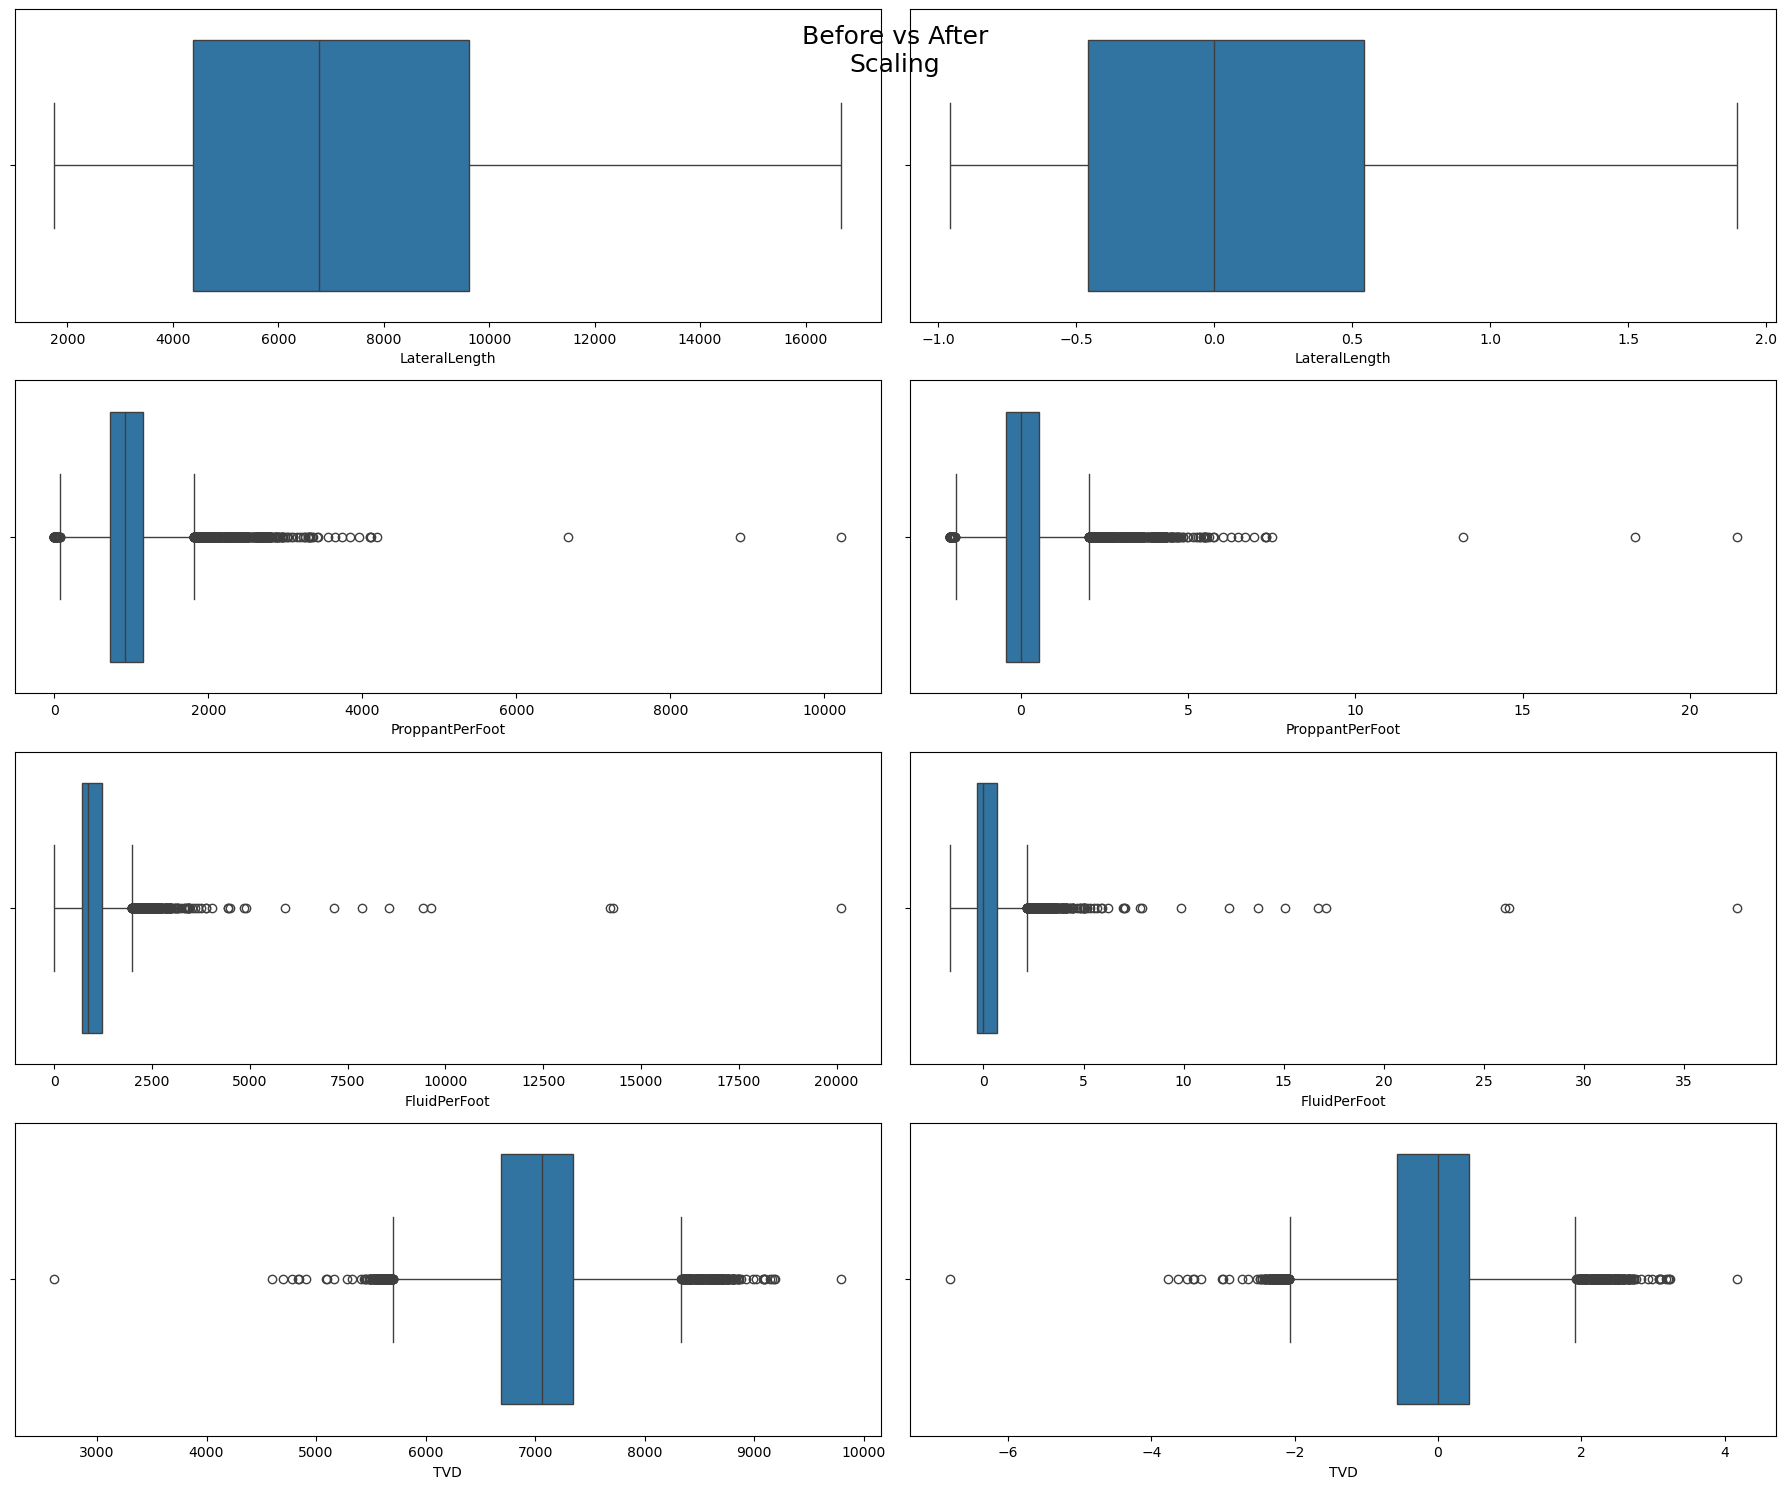

In [111]:
# Boxplots to see outliers and distribution
fig, axes = plt.subplots(4, 2, figsize=(18, 15))

sns.boxplot(ax=axes[0, 0], x='LateralLength', data=X_train)
sns.boxplot(ax=axes[1, 0], x='ProppantPerFoot', data=X_train)
sns.boxplot(ax=axes[2, 0], x='FluidPerFoot', data=X_train)
sns.boxplot(ax=axes[3, 0], x='TVD', data=X_train)

sns.boxplot(ax=axes[0, 1], x='LateralLength', data=X_imputed_train_labeled)
sns.boxplot(ax=axes[1, 1], x='ProppantPerFoot', data=X_imputed_train_labeled)
sns.boxplot(ax=axes[2, 1], x='FluidPerFoot', data=X_imputed_train_labeled)
sns.boxplot(ax=axes[3, 1], x='TVD', data=X_imputed_train_labeled)


plt.tight_layout()
fig.suptitle('Before vs After\nScaling', fontsize=18, va='top', ha='center')
plt.show();

__Before leaving the pre-processing of data step, This will be our used features.__

In [112]:
print(columns_pipeline_processor.feature_names_in_)

['BVHH' 'NioGOR' 'CodGOR' 'LateralLength' 'ProppantPerFoot' 'FluidPerFoot'
 'TVD' 'neighDistance' 'LeftNeighbourType' 'RightNeighbourType'
 'FormationAlias']


The **pipleline** for transforming new data is stored at var:  **columns_pipeline_processor**

# 3. create a predictive model to get to know the most important features for our model to confirm our analysis.

## Training the model

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Since the model isn't actually for predicting but for getting insights about the data, 
# we will make the hyper tuning simple with just (few options) in GridSearchCV - without trying different model.

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth':[30, 50, 100]
    
}

rfmodel = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
rfmodel.fit(X_imputed_train, Y_train)
print(f'Best parameters: {rfmodel.best_params_}')
rfmodel

Best parameters: {'max_depth': 100, 'n_estimators': 200}


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [30, 50, 100],
                         'n_estimators': [200, 400, 600]},
             scoring='neg_mean_squared_error')

In [114]:
##  THis block can be helpful if we are still trying different models manually or want to check things different in our own way. 

# cross_val_score_result = cross_val_score(estimator=rfmodel, X=X_imputed_train, y=Y_train, cv=3, scoring='neg_root_mean_squared_error', fit_params=None)

# print(f'Mean CV Score: {np.mean(-cross_val_score_result)}')
# print(f'Standard Deviation of CV Scores: {np.std(-cross_val_score_result)}')


In [115]:
# rfmodel

### Actually the most important thing to get out of a tree model is "getting insights", So ... mainly in stage of analyzing the data -> our opportunity now is to get more insights.

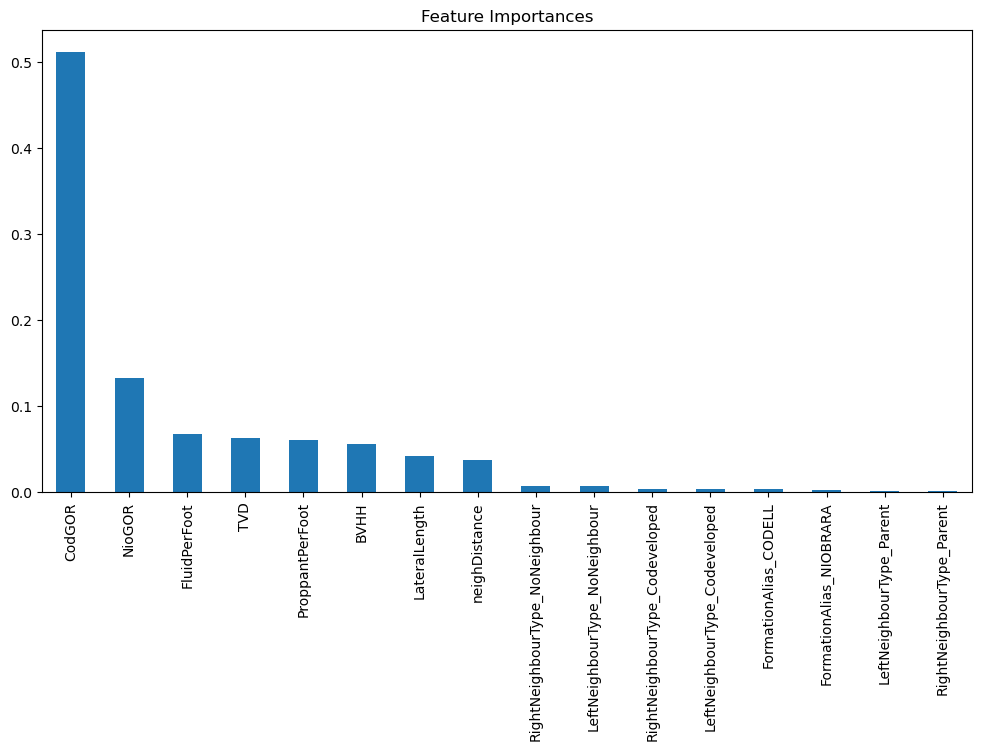

In [116]:
feature_importance = pd.Series(rfmodel.best_estimator_.feature_importances_, index=X_imputed_train_labeled.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

In [117]:
# which is the most import feature according to the model ?
feature_importance.sort_values(ascending=False)

CodGOR                            0.511886
NioGOR                            0.132411
FluidPerFoot                      0.067521
TVD                               0.062640
ProppantPerFoot                   0.060404
BVHH                              0.055659
LateralLength                     0.041977
neighDistance                     0.037437
RightNeighbourType_NoNeighbour    0.007111
LeftNeighbourType_NoNeighbour     0.006494
RightNeighbourType_Codeveloped    0.003950
LeftNeighbourType_Codeveloped     0.003426
FormationAlias_CODELL             0.003050
FormationAlias_NIOBRARA           0.002904
LeftNeighbourType_Parent          0.001566
RightNeighbourType_Parent         0.001564
dtype: float64

## test how our model perform on the test data.

In [118]:
from sklearn.metrics import mean_absolute_error

def predict_data(data, return_with_columns_names=False):
    data_imputed = columns_pipeline_processor.transform(data)
    # if columns needed to be cleared
    if return_with_columns_names:
        data_imputed = add_columns_names_after_imputation(columns_pipeline_imputer, data_imputed)
    
    preds = rfmodel.predict(data_imputed)
    return preds, data_imputed


In [119]:
Y_preds, _ = predict_data(X_test)

print('the mae score of the model is: ', mean_absolute_error(Y_test, Y_preds))

NormalizedOilEUR_mae = mean_absolute_error(Y_test['NormalizedOilEUR'], Y_preds[:,0])
print('The mae for Oil: ', NormalizedOilEUR_mae)

NormalizedGasEUR_mae =  mean_absolute_error(Y_test['NormalizedGasEUR'], Y_preds[:,1])
print('The mae for Gas: ', NormalizedGasEUR_mae)


the mae score of the model is:  12.748993017156078
The mae for Oil:  3.7955021203362804
The mae for Gas:  21.702483913975858


In [120]:
# Since the difference out of the model isn't large 
# it's important to look for the range of our data to make sure how (large) it is..

print('NormalizedOilEUR range of test data: ', round(Y_test['NormalizedOilEUR'].min(),2),' -> ', round(Y_test['NormalizedOilEUR'].max(),2))
print('NormalizedGasEUR range of test data: ', round(Y_test['NormalizedGasEUR'].min(), 2), ' -> ',round(Y_test['NormalizedGasEUR'].max(),2))

NormalizedOilEUR range of test data:  0.45  ->  76.2
NormalizedGasEUR range of test data:  0.0  ->  364.26


In [121]:
GAS_test_range = Y_test['NormalizedGasEUR'].max() - Y_test['NormalizedGasEUR'].min()
print(f"diff of Gas prediction to reality : {round(NormalizedGasEUR_mae/GAS_test_range * 100,2)}%")

OIL_test_range = Y_test['NormalizedOilEUR'].max() - Y_test['NormalizedOilEUR'].min()
print(f"diff of Oil prediction to reality : {round(NormalizedOilEUR_mae/ OIL_test_range * 100,2)}%")

diff of Gas prediction to reality : 5.96%
diff of Oil prediction to reality : 5.01%


In [122]:
# A look for the correlation to compare easily our observation to the model.
cleaned_df.corr(numeric_only=True)[target_columns].sort_values(by='NormalizedGasEUR', ascending=False)

,NormalizedOilEUR,NormalizedGasEUR
NormalizedGasEUR,0.295203,1.000000
CodGOR,-0.130669,0.615202
BVHH,0.084699,0.428263
NormalizedOilEUR,1.000000,0.295203
NioGOR,-0.024129,0.109095
TVD,-0.094506,0.105738
FluidPerFoot,0.228955,0.075338
ProppantPerFoot,0.232050,-0.056988
LateralLength,-0.050010,-0.074444
neighDistance,0.099138,-0.074480


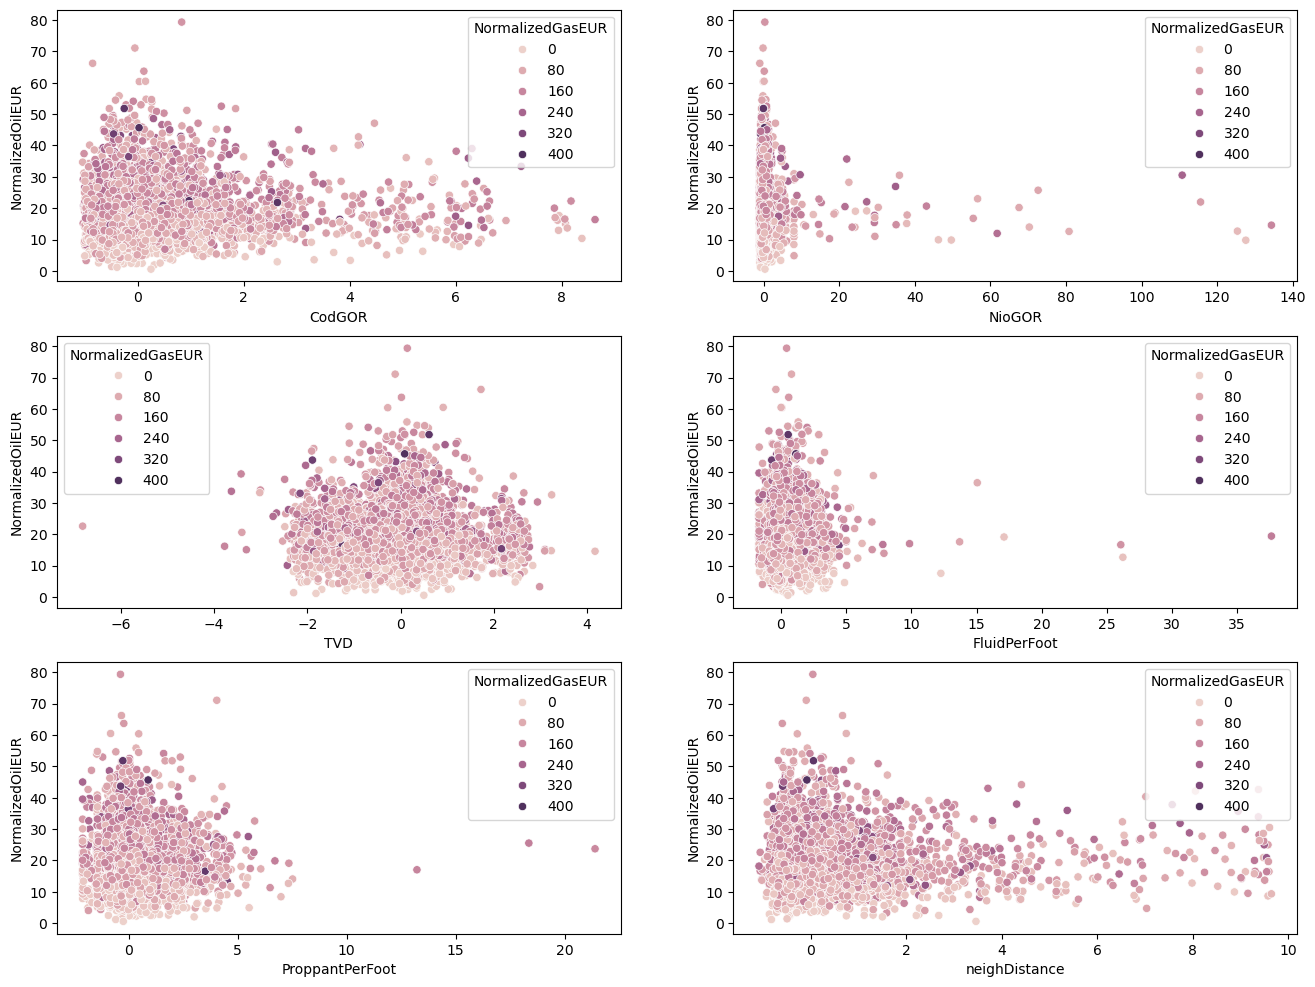

In [123]:
## this block will show the correlation between the features and the targets after fixing the data of training with the columns transferring pipeline we made. 
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
data_processed_train_full = pd.concat([X_imputed_train_labeled, Y_train], axis=1)
l_plot = ['CodGOR', 'NioGOR', 'TVD', 'FluidPerFoot', 'ProppantPerFoot', 'neighDistance']

for i in range(3):
    for j in range(2):
        sns.scatterplot(ax=axes[i,j], x=l_plot[i*2 + j], y='NormalizedOilEUR', hue='NormalizedGasEUR', data=data_processed_train_full);

plt.show();